In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/MyDrive/Prostate_MRI_Detection_3D_Model"

Mounted at /content/drive
/content/drive/MyDrive/Prostate_MRI_Detection_3D_Model


In [18]:
HOME_DIR =       "./"
DATA_DIR =       "./PROSTATEx_masks/Files/prostate/"
OUT_DIR =        "./aug_results/prostate/"
SLICED_OUT_DIR = "./data/sliced/prostate/"
AUG_OUT_DIR = "./data/augmented_test/prostate/"

In [4]:
!pip install -r requirement.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.3/91.3 KB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 KB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 60.5 MB/s eta 0:00:00


In [5]:
!pip install monai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 36.6 MB/s eta 0:00:00


In [6]:
!pip install dicom2nifti

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 KB 602.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 66.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 70.6 MB/s eta 0:00:00


In [19]:
import os
from glob import glob
import shutil
from tqdm import tqdm
import dicom2nifti
import numpy as np
import nibabel as nib
import pandas as pd


import json
import matplotlib.pyplot as plt
%matplotlib inline
from ipywidgets import interact, interactive, IntSlider, ToggleButtons
import os

from monai.utils import first

In [ ]:
def get_data_path(path):
  f = open( path + 'config.json')
  jdata = json.load(f)
  f.close()
  return jdata["path"]

In [8]:
# create directries if does not exist
if not os.path.exists(SLICED_OUT_DIR):
    os.makedirs(SLICED_OUT_DIR)
if not os.path.exists(SLICED_OUT_DIR + "Images"):
    os.makedirs(SLICED_OUT_DIR + "Images")
if not os.path.exists(SLICED_OUT_DIR + "mask_prostate"):
    os.makedirs(SLICED_OUT_DIR + "mask_prostate")

In [ ]:
def makeLabelNo(name):
  numb= name.split("-")[1]
  li=[80,81,83,85,86,87,88,89,90,91,93,96,98,125,127]
  if(int(numb) in li):
    return 'ProstateX-' + numb[1:]
  return name

In [ ]:
df = pd.read_csv(DATA_DIR +'image_list.csv')

In [ ]:
data = [{'image': DATA_DIR + 'Images/' + x + ".nii.gz", "label":DATA_DIR + 'mask_prostate/' + makeLabelNo(x.split("_")[0]) + ".nii.gz"  } for x in df['T2']]

In [ ]:
slice_size = 16

In [ ]:
from utils.preprocessing import create_same_slice_nifti

create_same_slice_nifti(data, slice_size, SLICED_OUT_DIR)

1/204
2/204
3/204
4/204
5/204
6/204
7/204
8/204
9/204
10/204
11/204
12/204
13/204
14/204
15/204
16/204
17/204
18/204
19/204
20/204
21/204
22/204
23/204
24/204
25/204
26/204
27/204
28/204
29/204
30/204
31/204
32/204
33/204
34/204
35/204
36/204
37/204
38/204
39/204
40/204
41/204
42/204
43/204
44/204
45/204
46/204
47/204
48/204
49/204
50/204
51/204
52/204
53/204
54/204
55/204
56/204
57/204
58/204
59/204
60/204
61/204
62/204
63/204
64/204
65/204
66/204
67/204
68/204
69/204
70/204
71/204
72/204
73/204
74/204
75/204
76/204
77/204
78/204
79/204
80/204
81/204
82/204
83/204
84/204
85/204
86/204
87/204
88/204
89/204
90/204
91/204
92/204
93/204
94/204
95/204
96/204
97/204
98/204
99/204
100/204
101/204
102/204
103/204
104/204
105/204
106/204
107/204
108/204
109/204
110/204
111/204
112/204
113/204
114/204
115/204
116/204
117/204
118/204
119/204
120/204
121/204
122/204
123/204
124/204
125/204
126/204
127/204
128/204
129/204
130/204
131/204
132/204
133/204
134/204
135/204
136/204
137/204
138/204
139/

In [ ]:
data = get_data_path(SLICED_OUT_DIR)

In [2]:
!pip install -r requirement.txt

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirement.txt'


In [ ]:
import torch
import nibabel as nib

import elasticdeform 
from skimage.util import random_noise
import scipy
from scipy.ndimage import affine_transform

import torchvision.transforms.functional as TF
import nibabel as nib
#import torchio as tio

import numpy as np
from scipy import ndimage
from scipy.ndimage import shift
import random

In [ ]:
def hFlipRotate(image, label):
    angle =  random.uniform(-5, 5)
    imgvol = np.array( image.dataobj )
    lblvol = np.array( label.dataobj )

    # horizontal flip
    img = np.fliplr(imgvol)
    lbl = np.fliplr(lblvol)
    
    #Rotate
    img = ndimage.rotate(img, angle, reshape=False)
    lbl = ndimage.rotate(lbl, angle, reshape=False)
    
    image = nib.Nifti1Image ( img, image.affine )
    label = nib.Nifti1Image ( lbl, label.affine )
    return image, label

In [ ]:
def hFlipRotateZoom(image, label):
    angle = random.uniform(-5, 5)
    imgvol = np.array(image.dataobj)
    lblvol = np.array(label.dataobj)

    # rotate
    img = ndimage.rotate(imgvol, angle, reshape=False)
    lbl = ndimage.rotate(lblvol, angle, reshape=False)

    # horizontal flip
    img = np.fliplr(img)
    lbl = np.fliplr(lbl)

    # zoom
    zoom_factor = random.uniform(0.8, 1.2)
    zoomed_img = ndimage.zoom(img, zoom_factor, order=1)
    zoomed_lbl = ndimage.zoom(lbl, zoom_factor, order=0)

    image = nib.Nifti1Image(zoomed_img, image.affine)
    label = nib.Nifti1Image(zoomed_lbl, label.affine)
    return image, label

In [ ]:
import scipy

def hFlipShear(image, label):
    angle = random.uniform(-5, 5)
    shear = random.uniform(-0.2,0.2)

    imgvol = np.array(image.dataobj)
    lblvol = np.array(label.dataobj)

    # horizontal flip
    img = np.fliplr(imgvol)
    lbl = np.fliplr(lblvol)

    # apply shear transformation
    matrix = np.array([[1, shear, 0], [0, 1, 0], [0, 0, 1]])
    img = scipy.ndimage.affine_transform(img, matrix)
    lbl = scipy.ndimage.affine_transform(lbl, matrix)

    image = nib.Nifti1Image(img, image.affine)
    label = nib.Nifti1Image(lbl, label.affine)
    return image, label


In [ ]:
def random_flip_rotate_noise(image, label):
    angle = random.uniform(-5, 5)
    imgvol = np.array(image.dataobj)
    lblvol = np.array(label.dataobj)

    # Randomly flip the image and label along one or more axes
    flip_axes = tuple(np.random.choice([-1, 1], size=image.ndim, replace=True))
    img = np.flip(imgvol, axis=flip_axes)
    lbl = np.flip(lblvol, axis=flip_axes)

    # Rotate
    img = ndimage.rotate(img, angle, reshape=False)
    lbl = ndimage.rotate(lbl, angle, reshape=False)

    # Add noise
    # Gaussian noise
    img = random_noise(img, mode='gaussian', var=0.000001, clip=False)
    # Salt & Pepper noise
    img = random_noise(img, mode='s&p', salt_vs_pepper=0.5, amount=0.0000005, clip=False)

    image = nib.Nifti1Image(img, image.affine)
    label = nib.Nifti1Image(lbl, label.affine)
    return image, label


In [ ]:
import scipy
from scipy.ndimage import affine_transform

def hFlipShearTrans(image, label):
    angle = random.uniform(-5, 5)
    shear = random.uniform(-0.2,0.2)
    translate = (random.uniform(-10,10), random.uniform(-10,10), random.uniform(-10,10))

    imgvol = np.array(image.dataobj)
    lblvol = np.array(label.dataobj)

    # horizontal flip
    img = np.fliplr(imgvol)
    lbl = np.fliplr(lblvol)

    # apply shear transformation
    matrix = np.array([[1, shear, 0, translate[0]], [0, 1, 0, translate[1]], [0, 0, 1, translate[2]], [0, 0, 0, 1]])
    img = affine_transform(img, matrix, order=1)
    lbl = affine_transform(lbl, matrix, order=0)

    image = nib.Nifti1Image(img, image.affine)
    label = nib.Nifti1Image(lbl, label.affine)
    return image, label

In [ ]:
def hFlipRotateNoise(image, label):
    angle =  random.uniform(-5, 5)
    imgvol = np.array( image.dataobj )
    lblvol = np.array( label.dataobj )

    # horizontal flip
    img = np.fliplr(imgvol)
    lbl = np.fliplr(lblvol)
    
    # Rotate
    img = ndimage.rotate(img, angle, reshape=False)
    lbl = ndimage.rotate(lbl, angle, reshape=False)
    
    # Noise
    # # Gaussian noise
    # img = random_noise(imgvol, mode='gaussian', var=0.0000001, clip=False)
    # # Salt & Pepper noise
    # img = random_noise(img, mode='s&p',salt_vs_pepper=0.5, amount=0.00000005, clip=False)


    
    image = nib.Nifti1Image ( img, image.affine )
    label = nib.Nifti1Image ( lblvol, label.affine )
    return image, label

In [ ]:
def random_flip_rotate_zoom_translate(image, label):
    angle = random.uniform(-5, 5)
    flip_axes = [ i for i in range(2) if i!=2 and np.random.choice([0, 1]) == 1]
    translate = (random.uniform(-10,10), random.uniform(-10,10))
    matrix = np.array([[1, 0, 0, translate[0]], [0, 1, 0, translate[1]], [0, 0, 1,  0], [0, 0, 0, 1]])

    imgvol = np.array(image.dataobj)
    lblvol = np.array(label.dataobj)

    # Rotate
    img = ndimage.rotate(imgvol, angle, reshape=False)
    lbl = ndimage.rotate(lblvol, angle, reshape=False)

    # Randomly flip the image and label along one or more axes, except for the z-axis
    img = np.flip(img, axis=flip_axes)
    lbl = np.flip(lbl, axis=flip_axes)

    # zoom
    zoom_factor = random.uniform(0.8, 1.2)
    img = ndimage.zoom(img, zoom_factor, order=1)
    lbl = ndimage.zoom(lbl, zoom_factor, order=0)

    # Translate
    img = affine_transform(img, matrix, order=1)
    lbl = affine_transform(lbl, matrix, order=0)

    image = nib.Nifti1Image(img, image.affine)
    label = nib.Nifti1Image(lbl, label.affine)
    return image, label


In [ ]:
def random_flip_rotate_zoom_shear_translate(image, label):
    
    angle = random.uniform(-5, 5)
    flip_axes = [ i for i in range(2) if i!=2 and np.random.choice([0, 1]) == 1]
    translate = (random.uniform(-10,10), random.uniform(-10,10))
    shear = random.uniform(-0.2,0.2)
    matrix = np.array([[1, shear, 0, translate[0]], [0, 1, 0, translate[1]], [0, 0, 1, 0], [0, 0, 0, 1]])
    

    imgvol = np.array(image.dataobj)
    lblvol = np.array(label.dataobj)

    # Rotate
    img = ndimage.rotate(imgvol, angle, reshape=False)
    lbl = ndimage.rotate(lblvol, angle, reshape=False)

    # Randomly flip the image and label along one or more axes, except for the z-axis
    img = np.flip(img, axis=flip_axes)
    lbl = np.flip(lbl, axis=flip_axes)

    # zoom
    zoom_factor = random.uniform(0.8, 1.2)
    img = ndimage.zoom(img, zoom_factor, order=1)
    lbl = ndimage.zoom(lbl, zoom_factor, order=0)

    # Translate
    img = affine_transform(img, matrix, order=1)
    lbl = affine_transform(lbl, matrix, order=0)

    image = nib.Nifti1Image(img, image.affine)
    label = nib.Nifti1Image(lbl, label.affine)
    return image, label


In [ ]:
def random_flip_rotate_translate_deform(image, label):
    angle = random.uniform(-5, 5)
    flip_axes = [ i for i in range(2) if i!=2 and np.random.choice([0, 1]) == 1]
    sigma = random.choice([2, 3])
    translate = (random.uniform(-10,10), random.uniform(-10,10))
    matrix = np.array([[1, 0, 0, translate[0]], [0, 1, 0, translate[1]], [0, 0, 1,  0], [0, 0, 0, 1]])

    imgvol = np.array(image.dataobj)
    lblvol = np.array(label.dataobj)

    # Rotate
    img = ndimage.rotate(imgvol, angle, reshape=False)
    lbl = ndimage.rotate(lblvol, angle, reshape=False)

    # Randomly flip the image and label along one or more axes, except for the z-axis
    img = np.flip(img, axis=flip_axes)
    lbl = np.flip(lbl, axis=flip_axes)

    # zoom
    zoom_factor = random.uniform(0.8, 1.2)
    img = ndimage.zoom(img, zoom_factor, order=1)
    lbl = ndimage.zoom(lbl, zoom_factor, order=0)

    # Elastic deformation
    [img, lbl] = elasticdeform.deform_random_grid([img, lbl], sigma=sigma, axis=[(0, 1), (0, 1)], order=[1, 0], mode='constant')
    


    # Translate
    img = affine_transform(img, matrix, order=1)
    lbl = affine_transform(lbl, matrix, order=0)

    image = nib.Nifti1Image(img, image.affine)
    label = nib.Nifti1Image(lbl, label.affine)
    return image, label


In [ ]:
import random
import numpy as np
import nibabel as nib
from scipy import ndimage
from skimage.exposure import adjust_gamma, rescale_intensity

def random_flip_rotate_zoom_translate_brightness(image, label):
    angle = random.uniform(-5, 5)
    flip_axes = [i for i in range(2) if i != 2 and np.random.choice([0, 1]) == 1]
    translate = (random.uniform(-10, 10), random.uniform(-10, 10))
    matrix = np.array([[1, 0, 0, translate[0]], [0, 1, 0, translate[1]], [0, 0, 1, 0], [0, 0, 0, 1]])

    imgvol = np.array(image.dataobj)
    lblvol = np.array(label.dataobj)

    # Rotate
    img = ndimage.rotate(imgvol, angle, reshape=False)
    lbl = ndimage.rotate(lblvol, angle, reshape=False)

    # Randomly flip the image and label along one or more axes, except for the z-axis
    img = np.flip(img, axis=flip_axes)
    lbl = np.flip(lbl, axis=flip_axes)

    # Zoom
    zoom_factor = random.uniform(0.8, 1.2)
    img = ndimage.zoom(img, zoom_factor, order=1)
    lbl = ndimage.zoom(lbl, zoom_factor, order=0)

    # Translate
    img = affine_transform(img, matrix, order=1)
    lbl = affine_transform(lbl, matrix, order=0)

    # Brightness
    gamma = random.uniform(0.8, 1.2)
    min_value = np.min(img)
    img = img - min_value
    img = adjust_gamma(img, gamma)

    # Contrast
    low = np.percentile(img, 10)
    high = np.percentile(img, 98)
    img = rescale_intensity(img, in_range=(low, high))

    image = nib.Nifti1Image(img, image.affine)
    label = nib.Nifti1Image(lbl, label.affine)
    return image, label


In [ ]:
import scipy
from scipy.ndimage import affine_transform

def hFlipRotateShearTrans(image, label):
    angle = random.uniform(-5, 5)
    shear = random.uniform(-0.2,0.2)
    translate = (random.uniform(-10,10), random.uniform(-10,10))

    imgvol = np.array(image.dataobj)
    lblvol = np.array(label.dataobj)

    # Rotate
    img = ndimage.rotate(imgvol, angle, reshape=False)
    lbl = ndimage.rotate(lblvol, angle, reshape=False)

    # horizontal flip
    img = np.fliplr(img)
    lbl = np.fliplr(lbl)


    # apply shear transformation
    matrix = np.array([[1, shear, 0, translate[0]], [0, 1, 0, translate[1]], [0, 0, 1, 0], [0, 0, 0, 1]])
    img = affine_transform(img, matrix, order=1)
    lbl = affine_transform(lbl, matrix, order=0)

    image = nib.Nifti1Image(img, image.affine)
    label = nib.Nifti1Image(lbl, label.affine)
    return image, label

In [ ]:
import numpy as np
import nibabel as nib
import random
import elasticdeform
from scipy import ndimage

def hFlipRotateTranslateElasticDeform(image, label):
    angle = random.uniform(-5, 5)
    shear = random.uniform(-0.2,0.2)
    translate = (random.uniform(-10,10), random.uniform(-10,10))

    imgvol = np.array(image.dataobj)
    lblvol = np.array(label.dataobj)

    # Rotate
    img = ndimage.rotate(imgvol, angle, reshape=False)
    lbl = ndimage.rotate(lblvol, angle, reshape=False)

    # horizontal flip
    img = np.fliplr(img)
    lbl = np.fliplr(lbl)


    # apply shear transformation
    matrix = np.array([[1, shear, 0, translate[0]], [0, 1, 0, translate[1]], [0, 0, 1, 0], [0, 0, 0, 1]])
    img = affine_transform(img, matrix, order=1)
    lbl = affine_transform(lbl, matrix, order=0)

    # Elastic deformation
    sigma = random.choice([2, 3])
    print(sigma)
    # img_deformed = elasticdeform.deform_random_grid(img, sigma=sigma, order=3, axis=(0, 1, 2))
    # lbl_deformed = elasticdeform.deform_random_grid(lbl, sigma=sigma, order=0, axis=(0, 1, 2))
    [img_deformed, lbl_deformed] = elasticdeform.deform_random_grid([img, lbl], sigma=sigma, axis=[(0, 1), (0, 1)], order=[1, 0], mode='constant')
    

    image = nib.Nifti1Image(img_deformed, image.affine)
    label = nib.Nifti1Image(lbl_deformed, label.affine)
    return image, label


In [ ]:
from Augmentation.augmentation import changeContrast, vFlipRotate, hFlipRotate

In [ ]:
# first image, label from orignal image
imagea =nib.load(data[0]["image"])
labela =nib.load(data[0]["label"])

imagea, labela = imagea.get_fdata(), labela.get_fdata()

In [ ]:
# first image, label from orignal image
imagea =nib.load(data[0]["image"])
labela =nib.load(data[0]["label"])
print(imagea.shape,labela.shape)
imagea, labela = random_flip_rotate_zoom_translate_brightness(imagea, labela)
imagea, labela = imagea.get_fdata(), labela.get_fdata()

(384, 384, 16) (384, 384, 16)


In [ ]:
# Define a function to visualize the data
def explore_3dimage(layer):
    plt.figure(figsize=(10, 5))
    channel = 2
    # plt.imshow(image11[0,0,:,:,layer], cmap='gray');
    # plt.title('Explore Layers of Prostate MRI', fontsize=20)
    # plt.axis('off')
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

    ax[0].imshow(imagea[:,:,layer], cmap='gray')
    ax[0].set_title(f"Image", fontsize=15)
    ax[0].axis('off');

    ax[1].imshow(labela[:,:,layer])
    ax[1].axis('off');
    return layer

In [ ]:
# Explore the preprocessed image, label
interact(explore_3dimage, layer=(0, 15))

interactive(children=(IntSlider(value=7, description='layer', max=15), Output()), _dom_classes=('widget-intera…

<function __main__.explore_3dimage(layer)>

In [ ]:
# first image, label from orignal image
image =nib.load(data[0]["image"])
label =nib.load(data[0]["label"])

image, label = image.get_fdata(), label.get_fdata()

In [ ]:
# Define a function to visualize the data
def explore_3dimage(layer):
    plt.figure(figsize=(10, 5))
    channel = 2
    # plt.imshow(image11[0,0,:,:,layer], cmap='gray');
    # plt.title('Explore Layers of Prostate MRI', fontsize=20)
    # plt.axis('off')
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

    ax[0].imshow(image[:,:,layer], cmap='gray')
    ax[0].set_title(f"Image", fontsize=15)
    ax[0].axis('off')

    ax[1].imshow(label[:,:,layer])
    ax[1].axis('off')
    return layer

In [ ]:
# Explore the preprocessed image, label
interact(explore_3dimage, layer=(0, 15))

interactive(children=(IntSlider(value=7, description='layer', max=15), Output()), _dom_classes=('widget-intera…

<function __main__.explore_3dimage(layer)>

In [ ]:
data = data[:16]

In [ ]:
import nibabel as nib
import random
import elasticdeform 
import numpy as np
import nibabel as nib

from scipy.ndimage import affine_transform, rotate, zoom
from skimage.exposure import adjust_gamma, rescale_intensity
from skimage.util import random_noise


def random_flip_rotate_zoom(image, label):
    angle = random.uniform(-5, 5)
    flip_axes = [ i for i in range(2) if i!=2 and np.random.choice([0, 1]) == 1]
    translate = (random.uniform(-10,10), random.uniform(-10,10))
    matrix = np.array([[1, 0, 0, translate[0]], [0, 1, 0, translate[1]], [0, 0, 1,  0], [0, 0, 0, 1]])

    imgvol = np.array(image.dataobj)
    lblvol = np.array(label.dataobj)

    # Rotate
    img = rotate(imgvol, angle, reshape=False)
    lbl = rotate(lblvol, angle, reshape=False)

    # Randomly flip the image and label along one or more axes, except for the z-axis
    img = np.flip(img, axis=flip_axes)
    lbl = np.flip(lbl, axis=flip_axes)

    # zoom
    zoom_factor = random.uniform(0.8, 1.2)
    img = zoom(img, zoom_factor, order=1)
    lbl = zoom(lbl, zoom_factor, order=0)

    # # Translate
    # img = affine_transform(img, matrix, order=1)
    # lbl = affine_transform(lbl, matrix, order=0)

    image = nib.Nifti1Image(img, image.affine)
    label = nib.Nifti1Image(lbl, label.affine)
    return image, label

In [ ]:
from Augmentation.augmentation import rotate

In [ ]:
from Augmentation.combine_augmentation import random_flip_rotate_zoom_translate, random_flip_rotate_zoom_shear_translate, random_flip_rotate_translate_deform, random_flip_rotate_zoom_translate_brightness, random_flip_rotate_noise

In [ ]:
data = get_data_path(SLICED_OUT_DIR)
data = data[:16]

In [ ]:
types = {  'FRZT' :  random_flip_rotate_zoom_translate }

for type,func in types.items():
    # create directries if does not exist
    if not os.path.exists(AUG_OUT_DIR + type ):
        os.makedirs(AUG_OUT_DIR + type)
    if not os.path.exists(AUG_OUT_DIR + type + "/Images"):
        os.makedirs(AUG_OUT_DIR + type + "/Images")
    if not os.path.exists(AUG_OUT_DIR + type + "/mask_prostate"):
        os.makedirs(AUG_OUT_DIR + type + "/mask_prostate")

In [ ]:
from utils.preprocessing import load_nifti

def augment(func, entry, name, paths):
    img, lbl = load_nifti(entry["image"], entry["label"])
    
    image, label = func(img, lbl)
    image_path = entry["image"].replace("data/sliced/prostate", "data/augmented_test/prostate/" + name)
    label_path = entry["label"].replace("data/sliced/prostate", "data/augmented_test/prostate/" + name)
    paths.append({"image":image_path, "label":label_path})
    image.to_filename(image_path )
    label.to_filename(label_path)
    

In [ ]:
len(data)

16

In [ ]:
from utils.preprocessing import save_to_json

paths = []
for type, func in types.items():
    #create augmented data
    
    for entry in data:
        augment(func, entry, type, paths)
        
   
save_to_json({"path": paths}, AUG_OUT_DIR + '/config.json')    


# Transform

In [20]:
def get_data_path(path):
  f = open( path + 'config.json')
  jdata = json.load(f)
  f.close()
  return jdata["path"]

In [21]:
data = get_data_path(SLICED_OUT_DIR)
aug_data = get_data_path(AUG_OUT_DIR)


train_size = int(0.8 * len(data))
train_aug_size = int(0.8 * len(aug_data))
train_data = data[:train_size] + aug_data[:train_aug_size]
test_data = data[train_size:]+ data[train_aug_size:]

In [9]:
len(train_data)

326

In [22]:
pixdim =(1.5, 1.5, 1.0)
a_min=0
a_max=500
spatial_size= [128, 128,16] #[384, 384,18]


In [23]:
from utils.transform import transform

train_loader = transform(train_data, a_min, a_max, spatial_size, pixdim)
test_loader = transform(test_data, a_min, a_max, spatial_size, pixdim)

c:\Users\envy\Desktop\Prostate_MRI\Prostate_MRI_Detection_3D_Model\packages\lib\site-packages\monai\utils\deprecate_utils.py:107: FutureWarning: <class 'monai.transforms.utility.array.AddChannel'>: Class `AddChannel` has been deprecated since version 0.8. please use MetaTensor data type and monai.transforms.EnsureChannelFirst instead.
  warn_deprecated(obj, msg, warning_category)


In [24]:
from monai.utils import first
import matplotlib.pyplot as plt
import torch
import os
import numpy as np
from monai.losses import DiceLoss
from tqdm import tqdm
from utils.train import train

In [25]:
model_dir = OUT_DIR 
data_in = [train_loader, test_loader]

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [27]:
from monai.networks.nets import UNet
from monai.networks.layers import Norm

unet = UNet(
    spatial_dims=3,
    in_channels=1,
    out_channels=1,
    channels=( 64, 128, 256,512), 
    strides=(2, 2, 2),
    num_res_units=2,
    norm=Norm.BATCH,
).to(device)

In [28]:
import os.path

path = OUT_DIR+ "best_metric_model.pth"

if (os.path.exists(path)):
    unet.load_state_dict(torch.load(
        os.path.join(path), map_location=torch.device('cpu')))

In [29]:
#loss_function = DiceCELoss(to_onehot_y=True, sigmoid=True, squared_pred=True, ce_weight=calculate_weights(1792651250,2510860).to(device))
loss_function = DiceLoss(to_onehot_y=True, sigmoid=True, squared_pred=True)
optimizer = torch.optim.Adam(unet.parameters(), 1e-5, weight_decay=1e-5, amsgrad=True)

In [30]:
train(unet, data_in, loss_function, optimizer, 250, model_dir, test_interval= 10,start_from=128, load_from=OUT_DIR)

----------
epoch 128/250


c:\Users\envy\Desktop\Prostate_MRI\Prostate_MRI_Detection_3D_Model\packages\lib\site-packages\monai\losses\dice.py:144: UserWarning: single channel prediction, `to_onehot_y=True` ignored.
  warnings.warn("single channel prediction, `to_onehot_y=True` ignored.")


1/326, Train_loss: 0.1908 Train_dice: 0.8092
2/326, Train_loss: 0.2573 Train_dice: 0.7427
3/326, Train_loss: 0.2991 Train_dice: 0.7009
4/326, Train_loss: 0.0397 Train_dice: 0.9603
5/326, Train_loss: 0.0565 Train_dice: 0.9435
6/326, Train_loss: 0.2163 Train_dice: 0.7837
7/326, Train_loss: 0.1108 Train_dice: 0.8892
8/326, Train_loss: 0.0740 Train_dice: 0.9260
9/326, Train_loss: 0.1235 Train_dice: 0.8765
10/326, Train_loss: 0.0863 Train_dice: 0.9137
11/326, Train_loss: 0.2391 Train_dice: 0.7609
12/326, Train_loss: 0.2615 Train_dice: 0.7385
13/326, Train_loss: 0.1540 Train_dice: 0.8460
14/326, Train_loss: 0.0689 Train_dice: 0.9311
15/326, Train_loss: 0.3233 Train_dice: 0.6767
16/326, Train_loss: 0.1207 Train_dice: 0.8793
17/326, Train_loss: 0.0608 Train_dice: 0.9392
18/326, Train_loss: 0.2655 Train_dice: 0.7345
19/326, Train_loss: 0.1203 Train_dice: 0.8797
20/326, Train_loss: 0.2043 Train_dice: 0.7957
21/326, Train_loss: 0.1044 Train_dice: 0.8956
22/326, Train_loss: 0.1222 Train_dice: 0.87

In [ ]:
from monai.utils import first
from monai.transforms import(
    Activations,
)

import matplotlib.pyplot as plt

import os
from glob import glob
import numpy as np

from monai.inferers import sliding_window_inference

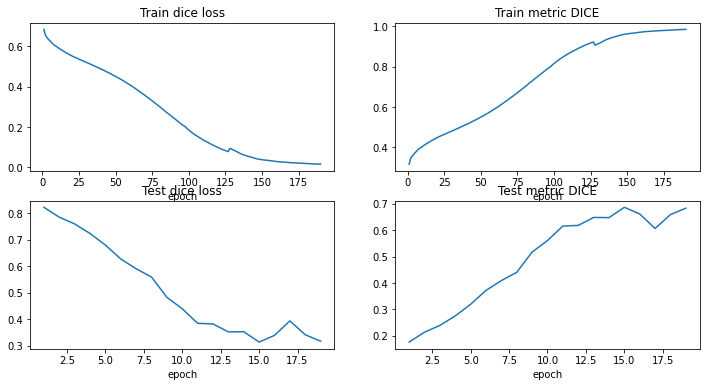

In [21]:
from utils.view import  plt_metrices

path = OUT_DIR
if (os.path.exists(path)):
    plt_metrices(path)